In [124]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import LabelEncoder,OrdinalEncoder,StandardScaler,OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn .neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier


from sklearn.metrics import classification_report,confusion_matrix,accuracy_score


In [2]:
df = pd.read_csv(r'D:\python\machine algorithms\penguins_lter.csv')

In [11]:
df.head(5)

,Species,Region,Island,Stage,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex
0,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",Yes,11/11/07,39.1,18.7,181.0,3750.0,MALE
1,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",Yes,11/11/07,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",Yes,11/16/07,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",Yes,11/16/07,NaN,NaN,NaN,NaN,NaN
4,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",Yes,11/16/07,36.7,19.3,193.0,3450.0,FEMALE


In [3]:
df.columns

Index(['studyName', 'Sample Number', 'Species', 'Region', 'Island', 'Stage',
       'Individual ID', 'Clutch Completion', 'Date Egg', 'Culmen Length (mm)',
       'Culmen Depth (mm)', 'Flipper Length (mm)', 'Body Mass (g)', 'Sex',
       'Delta 15 N (o/oo)', 'Delta 13 C (o/oo)', 'Comments'],
      dtype='object')

In [3]:
df.drop(['studyName','Sample Number','Delta 15 N (o/oo)', 'Delta 13 C (o/oo)', 'Comments','Individual ID'],axis=1,inplace=True	)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Species              344 non-null    object 
 1   Region               344 non-null    object 
 2   Island               344 non-null    object 
 3   Stage                344 non-null    object 
 4   Clutch Completion    344 non-null    object 
 5   Date Egg             344 non-null    object 
 6   Culmen Length (mm)   342 non-null    float64
 7   Culmen Depth (mm)    342 non-null    float64
 8   Flipper Length (mm)  342 non-null    float64
 9   Body Mass (g)        342 non-null    float64
 10  Sex                  334 non-null    object 
dtypes: float64(4), object(7)
memory usage: 29.7+ KB


In [4]:
df['Date Egg'] = pd.to_datetime(df['Date Egg'])

In [15]:
df.isnull().sum()

Species                 0
Region                  0
Island                  0
Stage                   0
Clutch Completion       0
Date Egg                0
Culmen Length (mm)      2
Culmen Depth (mm)       2
Flipper Length (mm)     2
Body Mass (g)           2
Sex                    10
dtype: int64

In [17]:
# df['Sex'].isin(df['Sex']!=['FEMALE','MALE'])


In [5]:
df.dropna(inplace=True)

In [19]:
df.duplicated().sum()

0

In [18]:
for col in df.columns:
    if df[col].dtypes =='object':
      print(f'{col} : {df[col].unique()}')
      print('*'*50)

Species : ['Adelie Penguin (Pygoscelis adeliae)'
 'Chinstrap penguin (Pygoscelis antarctica)'
 'Gentoo penguin (Pygoscelis papua)']
**************************************************
Region : ['Anvers']
**************************************************
Island : ['Torgersen' 'Biscoe' 'Dream']
**************************************************
Stage : ['Adult, 1 Egg Stage']
**************************************************
Clutch Completion : ['Yes' 'No']
**************************************************
Sex : ['MALE' 'FEMALE' '.']
**************************************************


In [6]:
df.drop(['Region','Stage'],axis=1,inplace=True)

In [7]:
species_map = {'Adelie Penguin (Pygoscelis adeliae)':'Adelie',
                'Chinstrap penguin (Pygoscelis antarctica)':'Chinstrap',
                 'Gentoo penguin (Pygoscelis papua)':'Gentoo'
                 }
df['Species'] = df['Species'].map(species_map)                 

In [20]:
df[df['Sex']=='.'].index

Int64Index([336], dtype='int64')

In [8]:
df.drop(df[df['Sex']=='.'].index,inplace=True)

In [31]:
df.columns

Index(['Species', 'Island', 'Clutch Completion', 'Date Egg',
       'Culmen Length (mm)', 'Culmen Depth (mm)', 'Flipper Length (mm)',
       'Body Mass (g)', 'Sex'],
      dtype='object')

In [9]:
categorical_col = df.select_dtypes('object').columns
numerical_col = df.select_dtypes('number').columns

In [42]:
numerical_col

Index(['Culmen Length (mm)', 'Culmen Depth (mm)', 'Flipper Length (mm)',
       'Body Mass (g)'],
      dtype='object')

In [33]:
df.head()

,Species,Island,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex
0,Adelie,Torgersen,Yes,2007-11-11,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,Yes,2007-11-11,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,Yes,2007-11-16,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,Yes,2007-11-16,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,Yes,2007-11-16,39.3,20.6,190.0,3650.0,MALE


In [38]:
df['Island'].value_counts()

Biscoe       163
Dream        123
Torgersen     47
Name: Island, dtype: int64

# Univariate analysis

In [39]:
for col in df.columns:
    if df[col].dtypes =='object':
      print(f'{col} : {df[col].value_counts()}')
      print('*'*50)

Species : Adelie       146
Gentoo       119
Chinstrap     68
Name: Species, dtype: int64
**************************************************
Island : Biscoe       163
Dream        123
Torgersen     47
Name: Island, dtype: int64
**************************************************
Clutch Completion : Yes    298
No      35
Name: Clutch Completion, dtype: int64
**************************************************
Sex : MALE      168
FEMALE    165
Name: Sex, dtype: int64
**************************************************


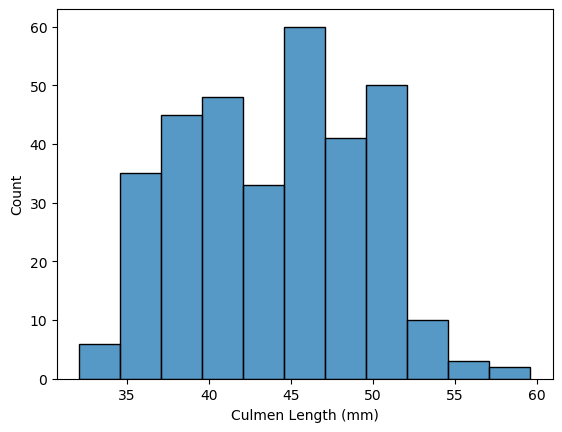

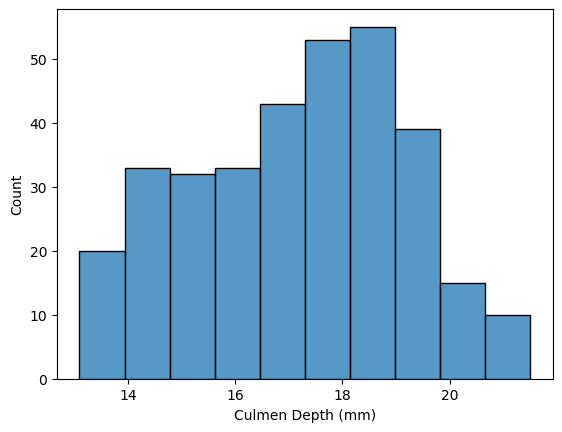

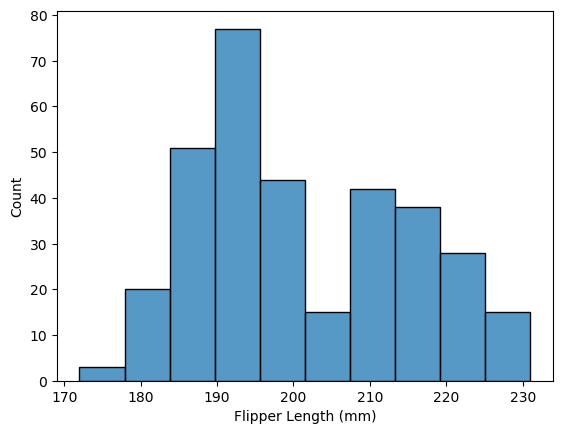

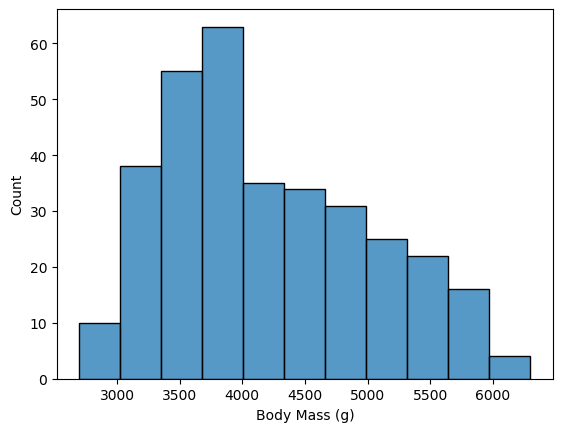

In [47]:
for col in numerical_col:
    sns.histplot(df,x=col)
    plt.show()


In [53]:
numerical_col

Index(['Culmen Length (mm)', 'Culmen Depth (mm)', 'Flipper Length (mm)',
       'Body Mass (g)'],
      dtype='object')

In [54]:
px.box(df,x='Culmen Length (mm)')

In [55]:
px.box(df,x='Culmen Depth (mm)')

In [57]:
px.box(df,x='Flipper Length (mm)')

In [56]:
px.box(df,x='Body Mass (g)')

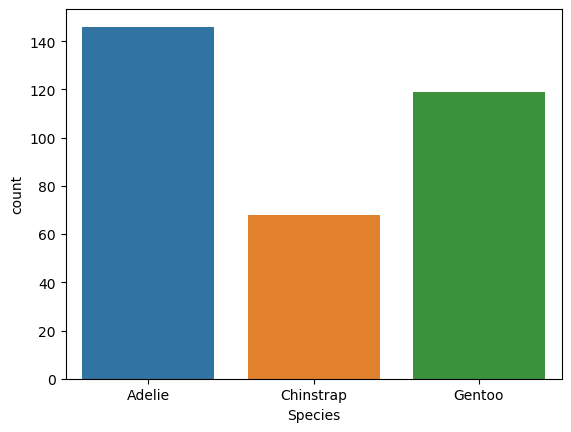

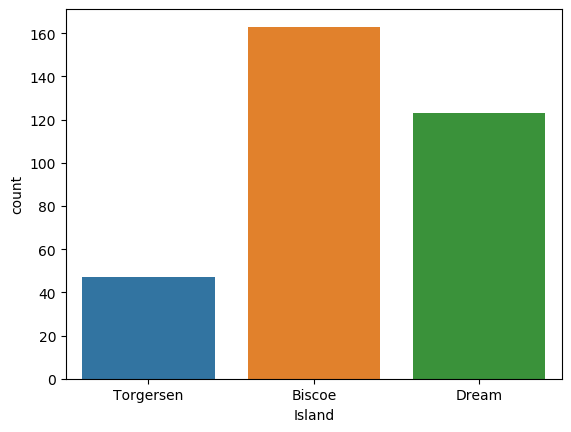

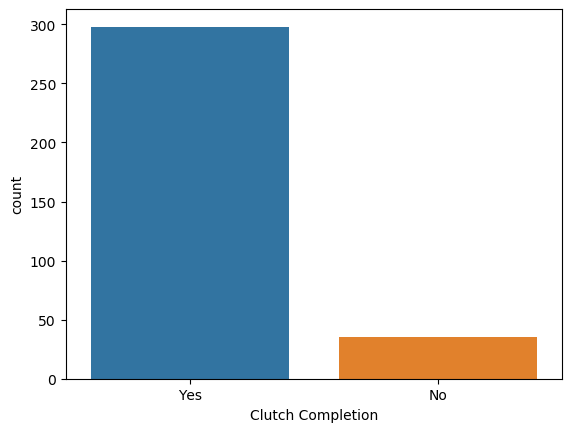

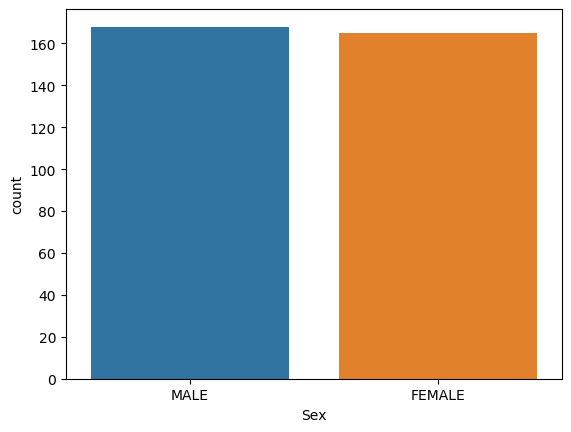

In [48]:
for col in categorical_col:
    sns.countplot(df,x=col)
    plt.show()


# Bivariant analysis

In [58]:
categorical_col

Index(['Species', 'Island', 'Clutch Completion', 'Sex'], dtype='object')

In [62]:
df.groupby('Species')['Sex'].value_counts()

Species    Sex   
Adelie     FEMALE    73
           MALE      73
Chinstrap  FEMALE    34
           MALE      34
Gentoo     MALE      61
           FEMALE    58
Name: Sex, dtype: int64

In [64]:
df.groupby('Island')['Species'].value_counts()

Island     Species  
Biscoe     Gentoo       119
           Adelie        44
Dream      Chinstrap     68
           Adelie        55
Torgersen  Adelie        47
Name: Species, dtype: int64

In [67]:
df.groupby('Island')['Sex'].value_counts()

Island     Sex   
Biscoe     MALE      83
           FEMALE    80
Dream      MALE      62
           FEMALE    61
Torgersen  FEMALE    24
           MALE      23
Name: Sex, dtype: int64

In [65]:
df.groupby('Species')['Clutch Completion'].value_counts()

Species    Clutch Completion
Adelie     Yes                  132
           No                    14
Chinstrap  Yes                   54
           No                    14
Gentoo     Yes                  112
           No                     7
Name: Clutch Completion, dtype: int64

In [68]:
df.groupby('Sex')['Clutch Completion'].value_counts()

Sex     Clutch Completion
FEMALE  Yes                  147
        No                    18
MALE    Yes                  151
        No                    17
Name: Clutch Completion, dtype: int64

In [69]:
numerical_col

Index(['Culmen Length (mm)', 'Culmen Depth (mm)', 'Flipper Length (mm)',
       'Body Mass (g)'],
      dtype='object')

In [71]:
df.groupby('Species')['Culmen Length (mm)'].mean()

Species
Adelie       38.823973
Chinstrap    48.833824
Gentoo       47.568067
Name: Culmen Length (mm), dtype: float64

In [75]:
df.groupby('Species')['Culmen Depth (mm)'].mean()

Species
Adelie       18.347260
Chinstrap    18.420588
Gentoo       14.996639
Name: Culmen Depth (mm), dtype: float64

In [74]:
df.groupby('Species')['Flipper Length (mm)'].mean()

Species
Adelie       190.102740
Chinstrap    195.823529
Gentoo       217.235294
Name: Flipper Length (mm), dtype: float64

In [73]:
df.groupby('Species')['Body Mass (g)'].mean()

Species
Adelie       3706.164384
Chinstrap    3733.088235
Gentoo       5092.436975
Name: Body Mass (g), dtype: float64

In [37]:
df.groupby('Sex')['Body Mass (g)'].mean()

Sex
0    4545.684524
1    3862.272727
Name: Body Mass (g), dtype: float64

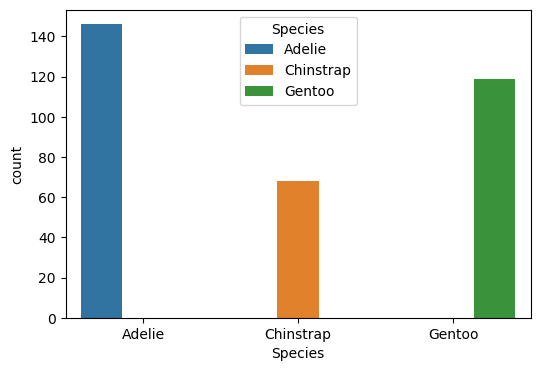

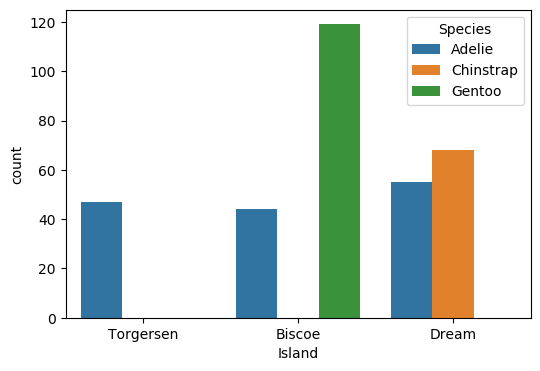

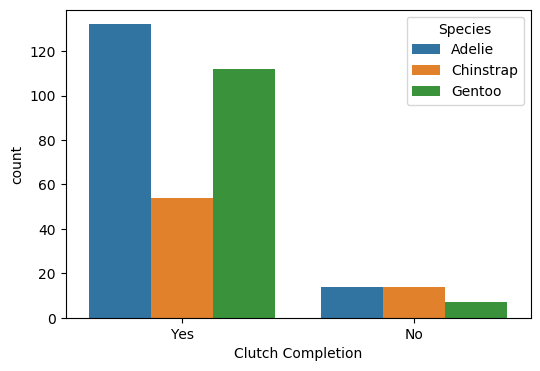

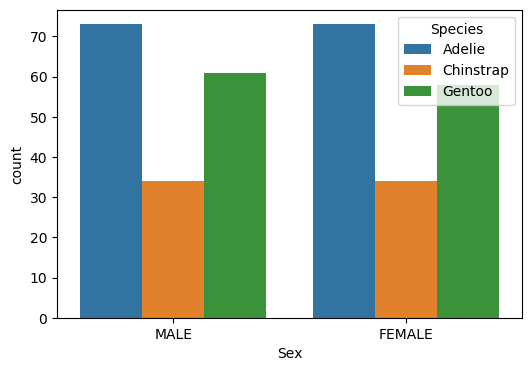

In [86]:
def bicountplot (Df,col):
    plt.figure(figsize=(6,4))
    sns.countplot(Df,x=col,hue='Species')
    plt.show()
for col in categorical_col:
    bicountplot(df,col)  

In [78]:
px.histogram(df,x='Culmen Length (mm)',color='Species')

In [79]:
px.histogram(df,x='Culmen Depth (mm)',color='Species')

In [81]:
px.histogram(df,x='Flipper Length (mm)',color='Species')

In [82]:
px.histogram(df,x='Body Mass (g)',color='Species')

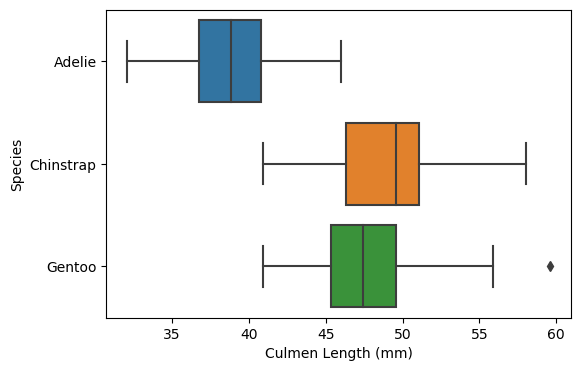

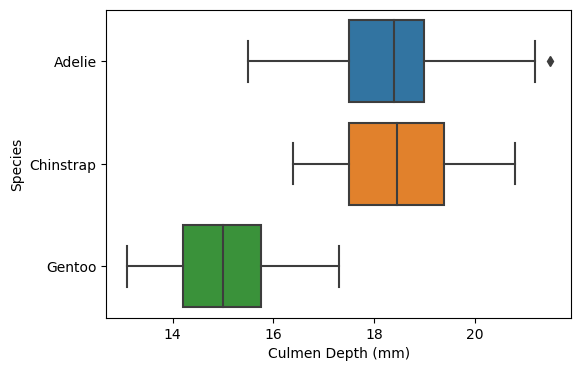

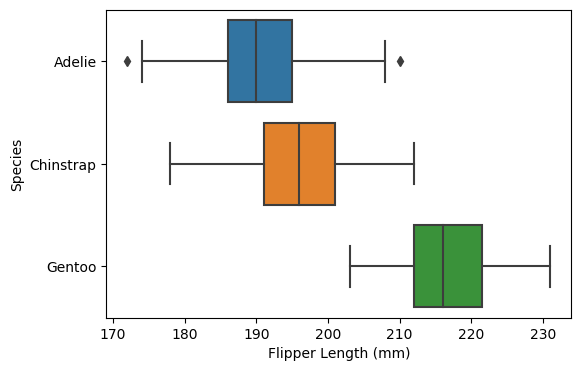

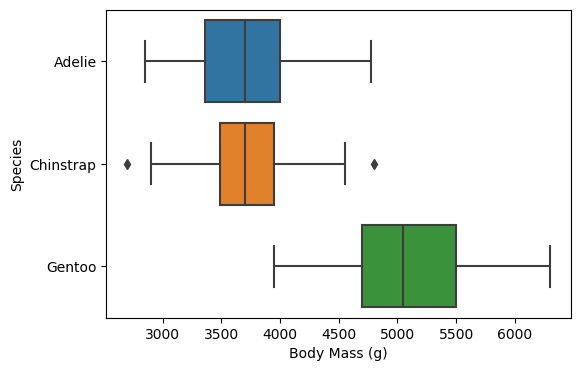

In [84]:
def biboxplot (Df,col):
    plt.figure(figsize=(6,4))
    sns.boxplot(Df,x=col,y='Species')
    plt.show()
for col in numerical_col:
    biboxplot(df,col) 

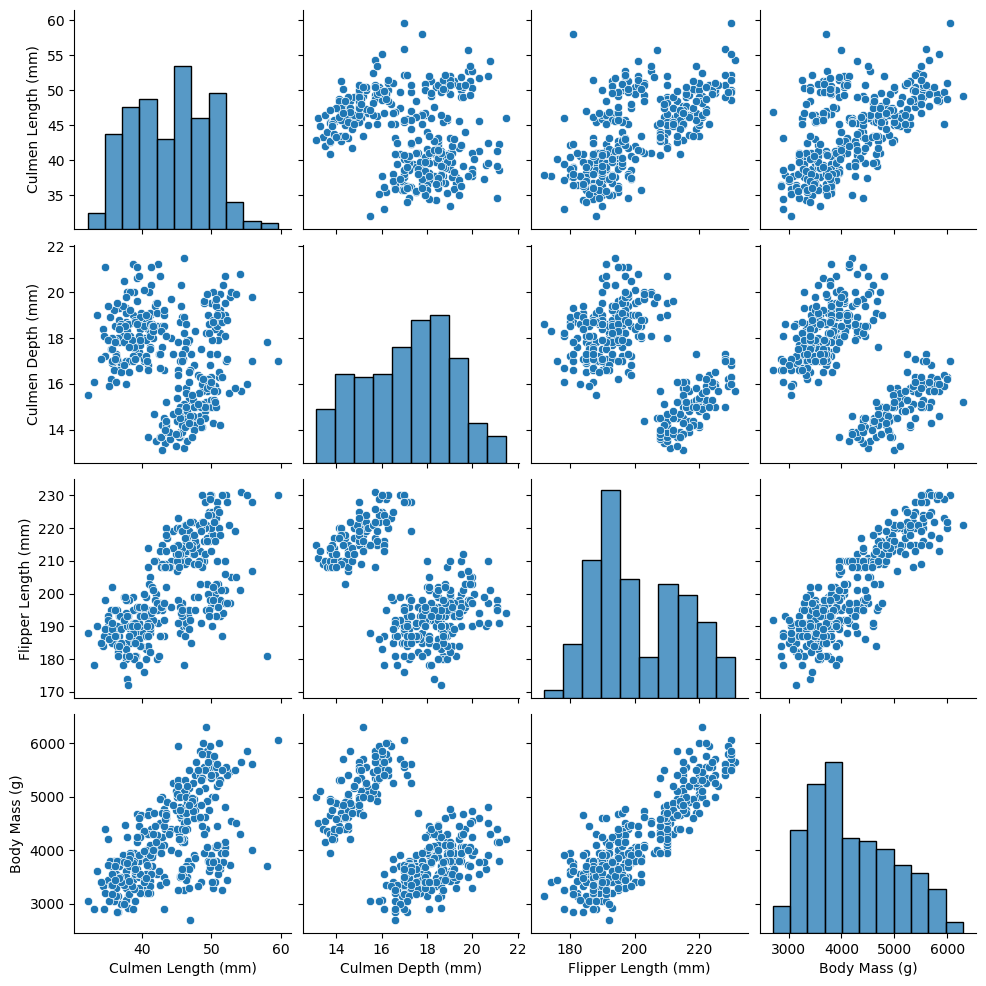

In [91]:
sns.pairplot(df)

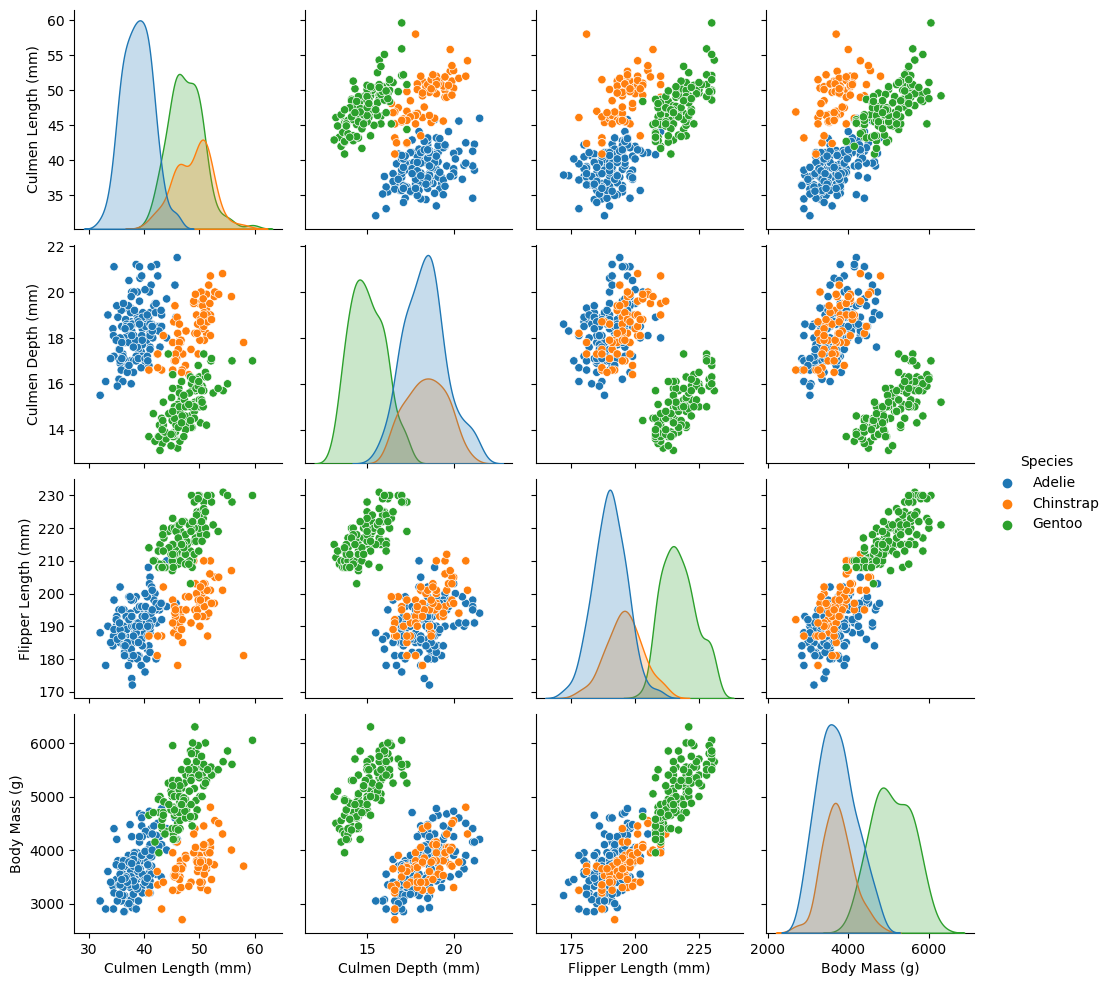

In [90]:
sns.pairplot(df,hue='Species')

In [103]:
fig = px.imshow(df.corr(),text_auto=True,width=500,height=400)
fig.show()

In [94]:
df['Species'].unique()

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

In [10]:
df_subset = df[df['Species']=='Adelie'] 

In [98]:
px.scatter(df_subset,x='Culmen Length (mm)',y='Culmen Depth (mm)')

In [102]:
fig = px.imshow(df_subset.corr(),text_auto=True,width=500,height=400)
fig.show()

In [106]:
df_subset2 = df[df['Species']=='Chinstrap']

In [107]:
px.scatter(df_subset2,x='Culmen Length (mm)',y='Culmen Depth (mm)')

In [108]:
fig = px.imshow(df_subset2.corr(),text_auto=True,width=500,height=400)
fig.show()


In [109]:
df_subset3 = df[df['Species']=='Gentoo']

In [110]:
px.scatter(df_subset3,x='Culmen Length (mm)',y='Culmen Depth (mm)')

# Multivariate analysis

In [87]:
df.groupby(['Species','Sex'])['Body Mass (g)'].mean()

Species    Sex   
Adelie     FEMALE    3368.835616
           MALE      4043.493151
Chinstrap  FEMALE    3527.205882
           MALE      3938.970588
Gentoo     FEMALE    4679.741379
           MALE      5484.836066
Name: Body Mass (g), dtype: float64

In [88]:
df.groupby(['Species','Sex'])['Culmen Length (mm)'].mean()

Species    Sex   
Adelie     FEMALE    37.257534
           MALE      40.390411
Chinstrap  FEMALE    46.573529
           MALE      51.094118
Gentoo     FEMALE    45.563793
           MALE      49.473770
Name: Culmen Length (mm), dtype: float64

In [91]:
df.groupby(['Species','Sex'])['Culmen Depth (mm)'].mean()

Species    Sex   
Adelie     FEMALE    17.621918
           MALE      19.072603
Chinstrap  FEMALE    17.588235
           MALE      19.252941
Gentoo     FEMALE    14.237931
           MALE      15.718033
Name: Culmen Depth (mm), dtype: float64

In [94]:
df.groupby(['Species','Sex'])['Flipper Length (mm)'].mean()

Species    Sex   
Adelie     FEMALE    187.794521
           MALE      192.410959
Chinstrap  FEMALE    191.735294
           MALE      199.911765
Gentoo     FEMALE    212.706897
           MALE      221.540984
Name: Flipper Length (mm), dtype: float64

In [111]:
df.columns

Index(['Species', 'Island', 'Clutch Completion', 'Date Egg',
       'Culmen Length (mm)', 'Culmen Depth (mm)', 'Flipper Length (mm)',
       'Body Mass (g)', 'Sex'],
      dtype='object')

In [29]:
df['year'] = df['Date Egg'].dt.year

In [12]:
df.drop('Date Egg',axis =1,inplace=True)

In [32]:
df['Island'].unique()

array(['Torgersen', 'Biscoe', 'Dream'], dtype=object)

In [11]:
species = {'Adelie':0,'Chinstrap':1,'Gentoo':2}
island  = {'Torgersen':0,'Biscoe':1,'Dream':2}
clutch_completion = {'Yes':1,'No':0}
sex = {'MALE':0,'FEMALE':1}
df['Species'] = df['Species'].map(species)
df['Island'] = df['Island'].map(island)
df['Clutch Completion'] = df['Clutch Completion'].map(clutch_completion)
df['Sex'] = df['Sex'].map(sex)

In [34]:
df

,Species,Island,Clutch Completion,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,year
0,0,0,1,39.1,18.7,181.0,3750.0,0,2007
1,0,0,1,39.5,17.4,186.0,3800.0,1,2007
2,0,0,1,40.3,18.0,195.0,3250.0,1,2007
4,0,0,1,36.7,19.3,193.0,3450.0,1,2007
5,0,0,1,39.3,20.6,190.0,3650.0,0,2007
...,...,...,...,...,...,...,...,...,...
338,2,1,0,47.2,13.7,214.0,4925.0,1,2009
340,2,1,1,46.8,14.3,215.0,4850.0,1,2009
341,2,1,1,50.4,15.7,222.0,5750.0,0,2009
342,2,1,1,45.2,14.8,212.0,5200.0,1,2009


In [36]:
fig = px.imshow(df.corr(),text_auto=True,width=1000,height=800)
fig.show()


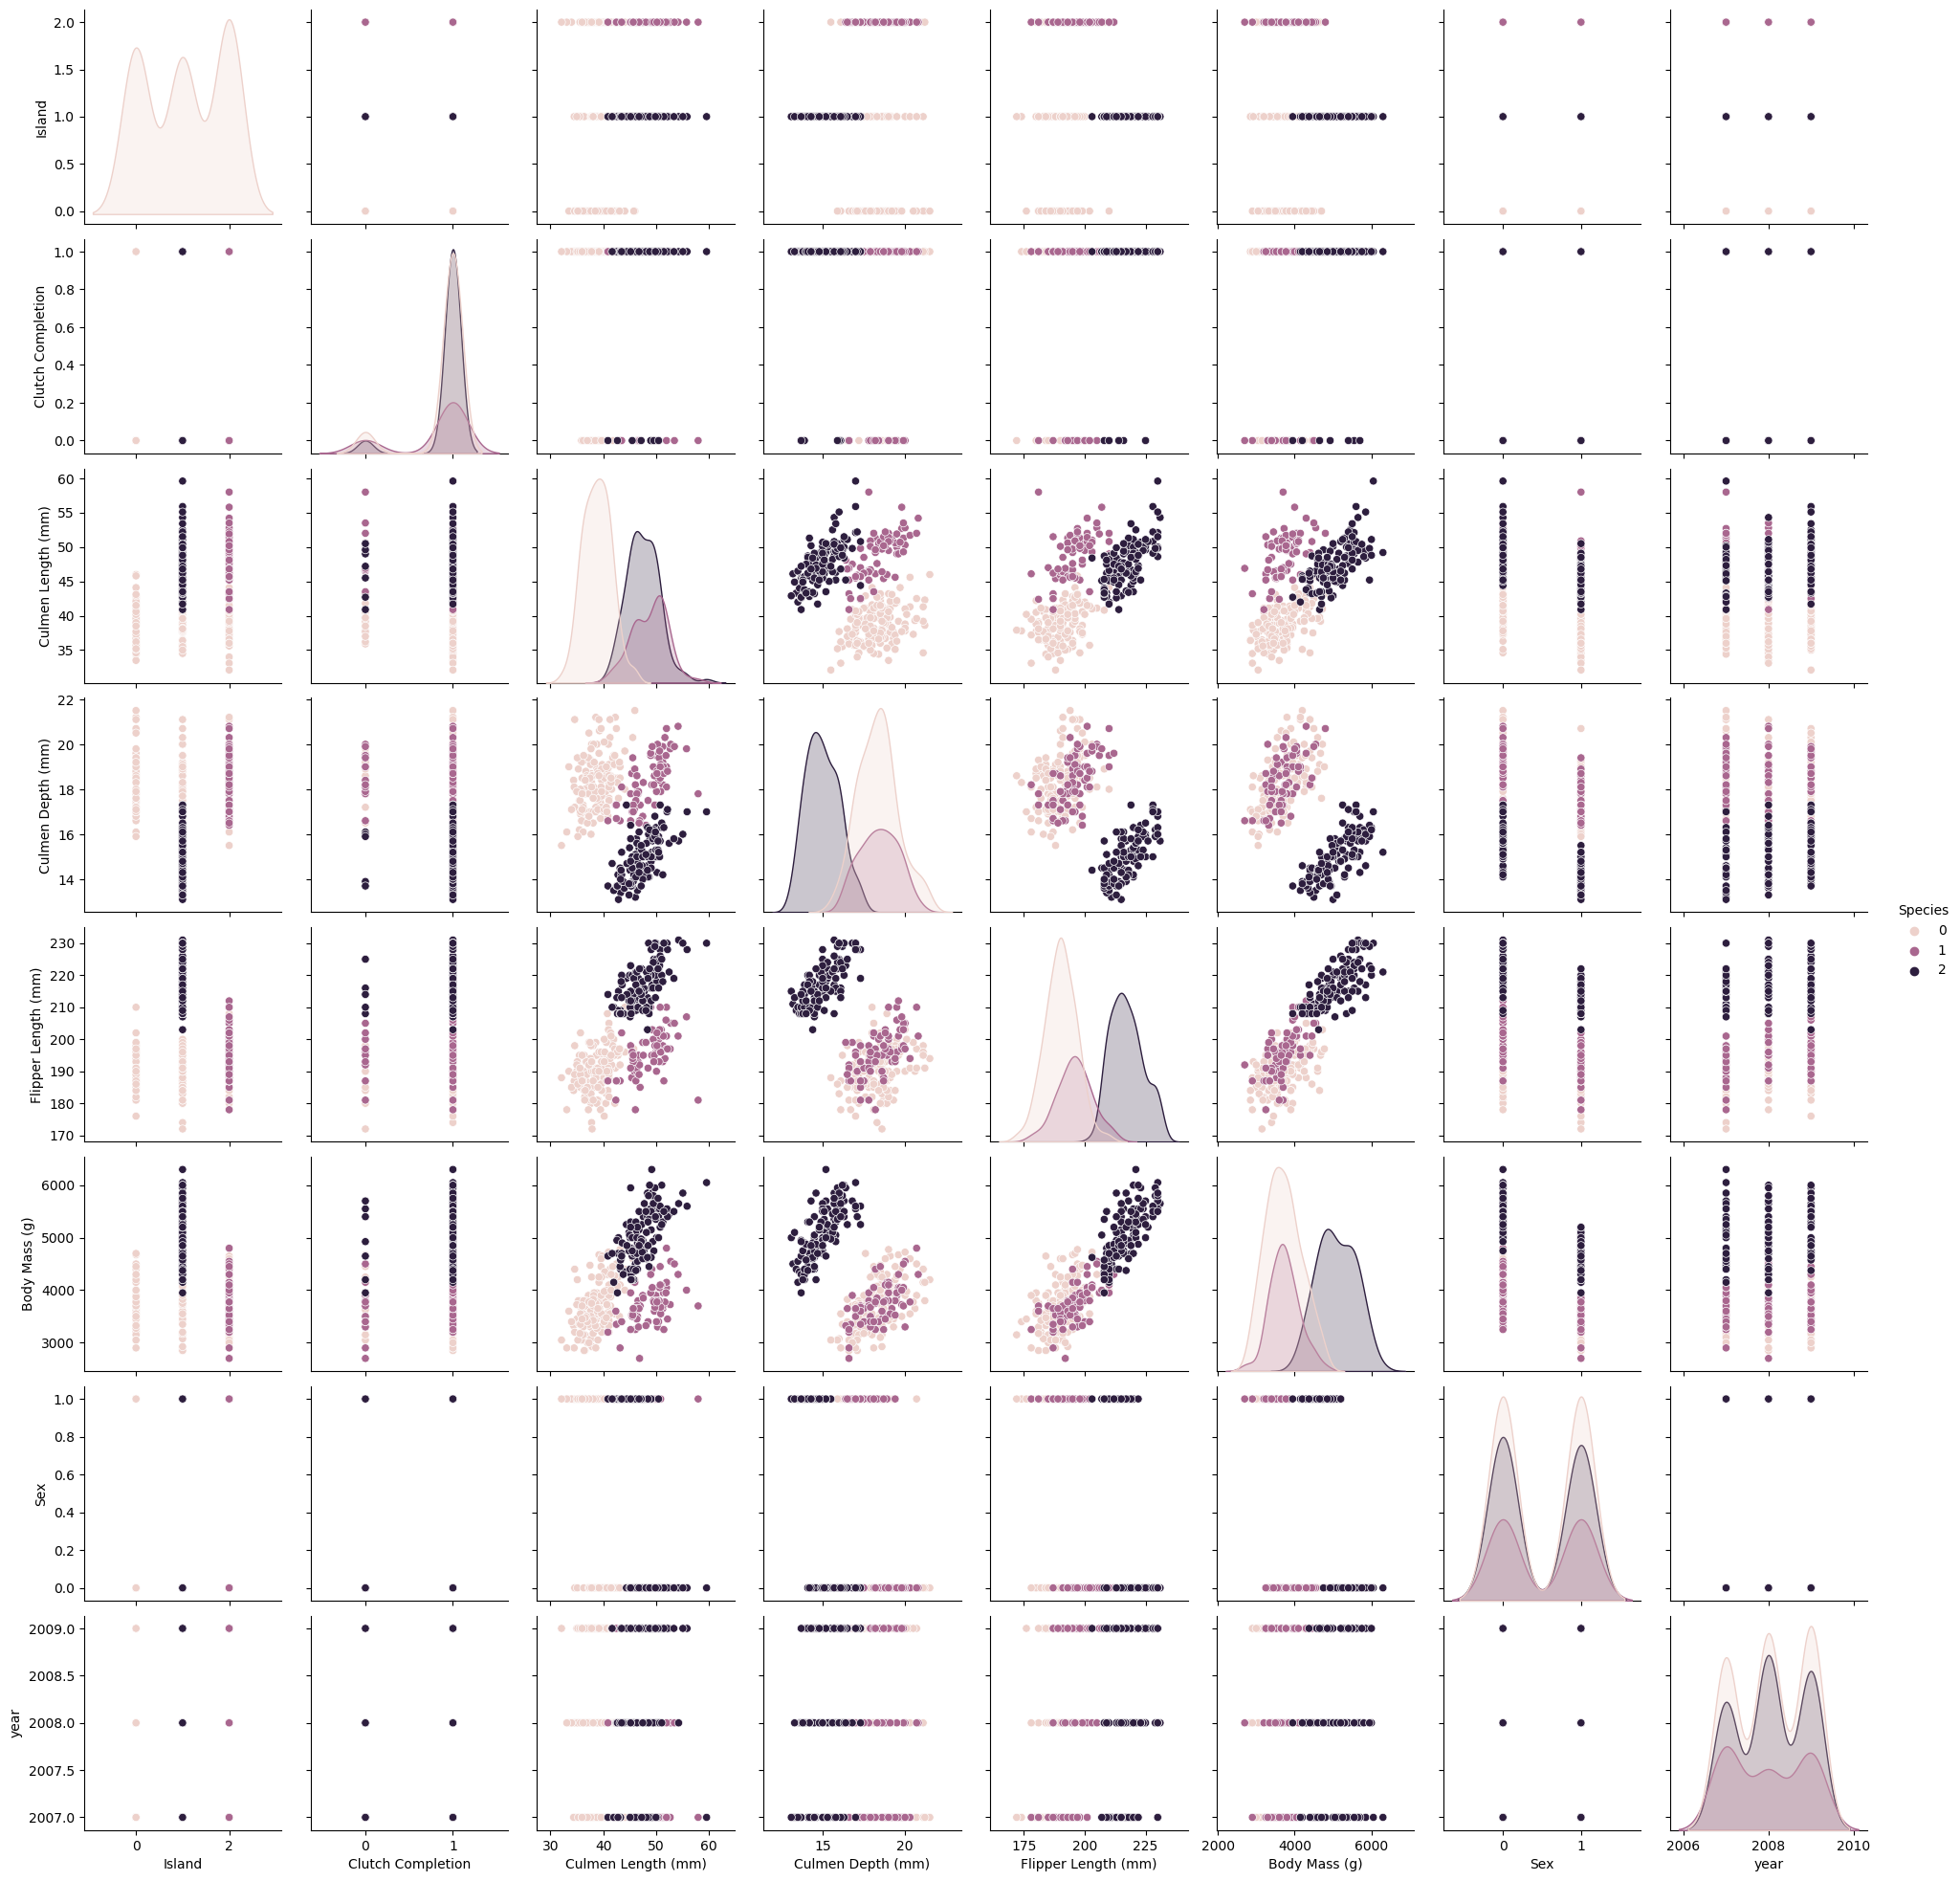

In [38]:
sns.pairplot(df,hue='Species')

In [13]:
df.drop('Clutch Completion',axis=1,inplace=True)

In [14]:
species = {0:'Adelie',1:'Chinstrap',2:'Gentoo'}
island  = {0:'Torgersen',1:'Biscoe',2:'Dream'}
sex = {0:'MALE',1:'FEMALE'}
df['Species'] = df['Species'].map(species)
df['Island'] = df['Island'].map(island)
df['Sex'] = df['Sex'].map(sex)

In [17]:
df.head()

,Species,Island,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE


In [19]:
numerical_col

Index(['Culmen Length (mm)', 'Culmen Depth (mm)', 'Flipper Length (mm)',
       'Body Mass (g)'],
      dtype='object')

In [43]:
x = df.iloc[:,1:]
y = df['Species']
y
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=.7,random_state=0)


In [44]:
x_train

,Island,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex
165,Dream,52.0,18.1,201.0,4050.0,MALE
156,Dream,52.7,19.8,197.0,3725.0,MALE
112,Biscoe,39.7,17.7,193.0,3200.0,FEMALE
220,Biscoe,46.1,13.2,211.0,4500.0,FEMALE
96,Dream,38.1,18.6,190.0,3700.0,FEMALE
...,...,...,...,...,...,...
332,Biscoe,43.5,15.2,213.0,4650.0,FEMALE
198,Dream,50.1,17.9,190.0,3400.0,FEMALE
123,Torgersen,41.4,18.5,202.0,3875.0,MALE
53,Biscoe,42.0,19.5,200.0,4050.0,MALE


In [30]:
x_train[numerical_col].columns

Index(['Culmen Length (mm)', 'Culmen Depth (mm)', 'Flipper Length (mm)',
       'Body Mass (g)'],
      dtype='object')

In [47]:
standard = StandardScaler()
scaled_train = pd.DataFrame(standard.fit_transform(x_train[numerical_col]),columns=numerical_col,index=x_train.index)
scaled_test = pd.DataFrame(standard.transform(x_test[numerical_col]),columns=numerical_col,index=x_test.index)


In [51]:
y_train

165    Chinstrap
156    Chinstrap
112       Adelie
220       Gentoo
96        Adelie
         ...    
332       Gentoo
198    Chinstrap
123       Adelie
53        Adelie
178    Chinstrap
Name: Species, Length: 233, dtype: object

In [63]:
encoder = OneHotEncoder()
encoded_train = encoder.fit_transform(x_train[['Island','Sex']])
encoded_test = encoder.transform(x_test[['Island','Sex']])

one_hot_train= pd.DataFrame(encoded_train.toarray(),columns=encoder.get_feature_names_out(),index=x_train.index)
one_hot_test= pd.DataFrame(encoded_test.toarray(),columns=encoder.get_feature_names_out(),index=x_test.index)


In [77]:
X_train = pd.concat([scaled_train,one_hot_train],axis=1)
X_test = pd.concat([scaled_test,one_hot_test],axis=1)

In [78]:
X_test

,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Island_Biscoe,Island_Dream,Island_Torgersen,Sex_FEMALE,Sex_MALE
62,-1.252095,-0.117421,-1.214667,-0.792305,1.0,0.0,0.0,1.0,0.0
60,-1.598642,-0.167074,-1.214667,-1.356182,1.0,0.0,0.0,1.0,0.0
283,1.793873,-0.762914,2.173882,1.776468,1.0,0.0,0.0,0.0,1.0
107,-1.142659,1.372179,-0.846347,-0.416387,1.0,0.0,0.0,0.0,1.0
65,-0.522522,0.379113,-0.699019,-0.353734,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...
132,-1.398009,0.627379,-0.625355,-0.917611,0.0,1.0,0.0,1.0,0.0
222,0.772471,-1.557367,0.626935,0.272796,1.0,0.0,0.0,1.0,0.0
51,-0.796112,0.825993,-0.993675,0.084837,1.0,0.0,0.0,0.0,1.0
226,0.170573,-1.309100,0.700599,0.711367,1.0,0.0,0.0,1.0,0.0


In [79]:
label_encoder = LabelEncoder()
y_train = pd.DataFrame(label_encoder.fit_transform(y_train))
y_test = label_encoder.transform(y_test)


In [115]:
X_train.drop(['Sex_FEMALE','Sex_MALE'],axis=1,inplace=True)
X_test.drop(['Sex_FEMALE','Sex_MALE'],axis=1,inplace=True)

In [138]:
acc_train = []
acc_test = []
models = [KNeighborsClassifier(),RandomForestClassifier(),XGBClassifier(use_label_encoder=False)]

In [140]:
def train_my_model(model,x_train,y_train,x_test):
    model.fit(x_train,y_train)
    pred_train = model.predict(x_train)

    pred_test = model.predict(x_test)
    return pred_train,pred_test

def evaluate_model(y_test,pred_train,pred_test):
    fig = px.imshow(confusion_matrix(y_test,pred_test),text_auto=True,width=600,height=400)
    fig.show()
    report = classification_report(y_test,pred_test)
    print(f'{report}\n {"*"*50}')
    accuracy_train = accuracy_score(y_train,pred_train)
    accuracy_test= accuracy_score(y_test,pred_test)
    print(accuracy_train)
    print(accuracy_test)
    acc_train.append(accuracy_train)
    acc_test.append(accuracy_test)
    
    

      
      
    


In [136]:
logistic_reg = LogisticRegression()
pred_train,pred_test = train_my_model(logistic_reg,X_train,y_train,X_test)


In [137]:
evaluate_model(y_test,pred_train,pred_test)

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        48
           1       1.00      0.88      0.93        16
           2       1.00      1.00      1.00        36

    accuracy                           0.98       100
   macro avg       0.99      0.96      0.97       100
weighted avg       0.98      0.98      0.98       100

 **************************************************
0.9957081545064378
0.98


In [141]:
acc_test

[]

In [144]:
for model in models:
    print(f'model')
    pred_train,pred_test = train_my_model(model,X_train,y_train,X_test)
    evaluate_model(y_test,pred_train,pred_test)
    

model


              precision    recall  f1-score   support

           0       0.96      1.00      0.98        48
           1       1.00      0.88      0.93        16
           2       1.00      1.00      1.00        36

    accuracy                           0.98       100
   macro avg       0.99      0.96      0.97       100
weighted avg       0.98      0.98      0.98       100

 **************************************************
0.9957081545064378
0.98
model


              precision    recall  f1-score   support

           0       0.96      1.00      0.98        48
           1       1.00      0.88      0.93        16
           2       1.00      1.00      1.00        36

    accuracy                           0.98       100
   macro avg       0.99      0.96      0.97       100
weighted avg       0.98      0.98      0.98       100

 **************************************************
1.0
0.98
model


              precision    recall  f1-score   support

           0       0.98      1.00      0.99        48
           1       1.00      0.94      0.97        16
           2       1.00      1.00      1.00        36

    accuracy                           0.99       100
   macro avg       0.99      0.98      0.99       100
weighted avg       0.99      0.99      0.99       100

 **************************************************
1.0
0.99
